In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('sales_data.csv')
df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


In [3]:
# Set the aesthetic theme
sns.set_theme(style="whitegrid")

In [4]:
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [6]:
# Set aesthetic parameters
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)

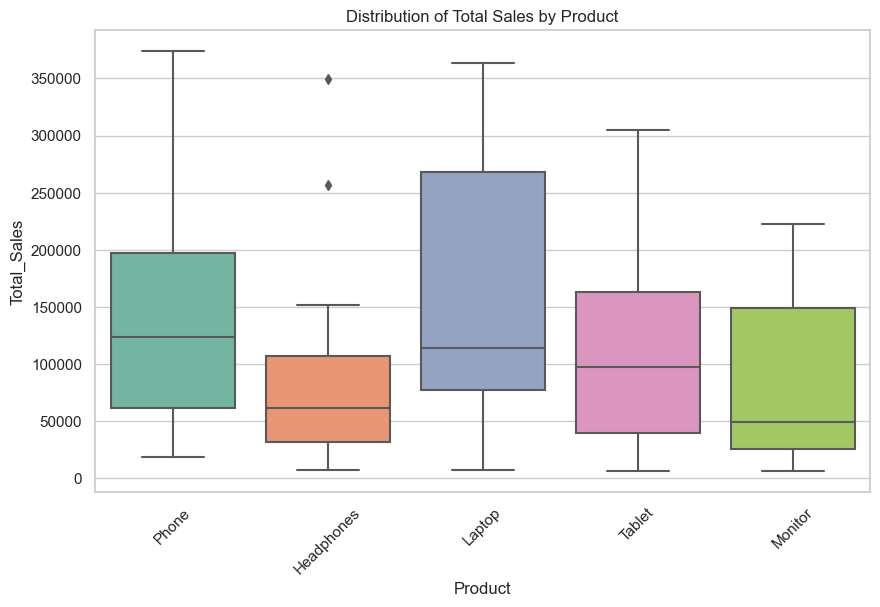

In [7]:
# 1. Box plot of Total Sales by Product
plt.clf()
sns.boxplot(data=df, x='Product', y='Total_Sales', palette='Set2')
plt.title('Distribution of Total Sales by Product')
plt.xticks(rotation=45)
plt.savefig('box_plot_product_sales.png')

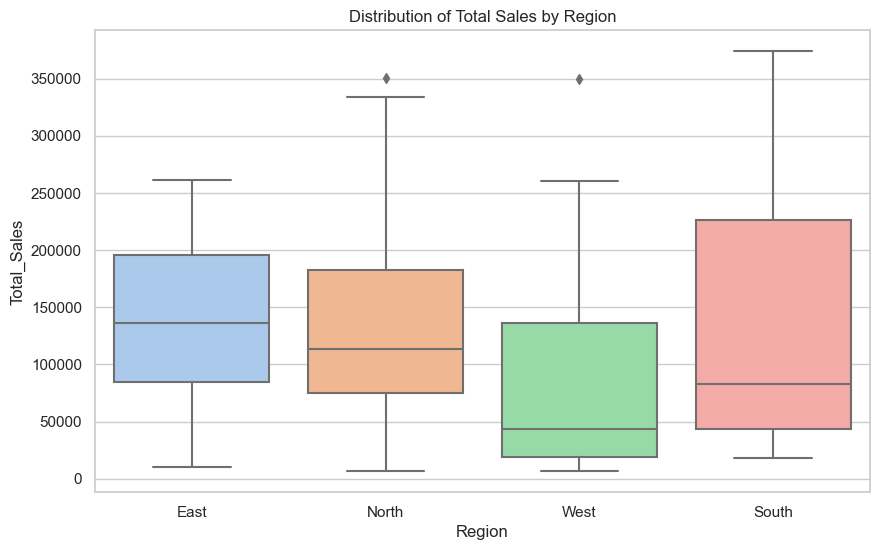

In [8]:
# 2. Box plot of Total Sales by Region
plt.clf()
sns.boxplot(data=df, x='Region', y='Total_Sales', palette='pastel')
plt.title('Distribution of Total Sales by Region')
plt.savefig('box_plot_region_sales.png')

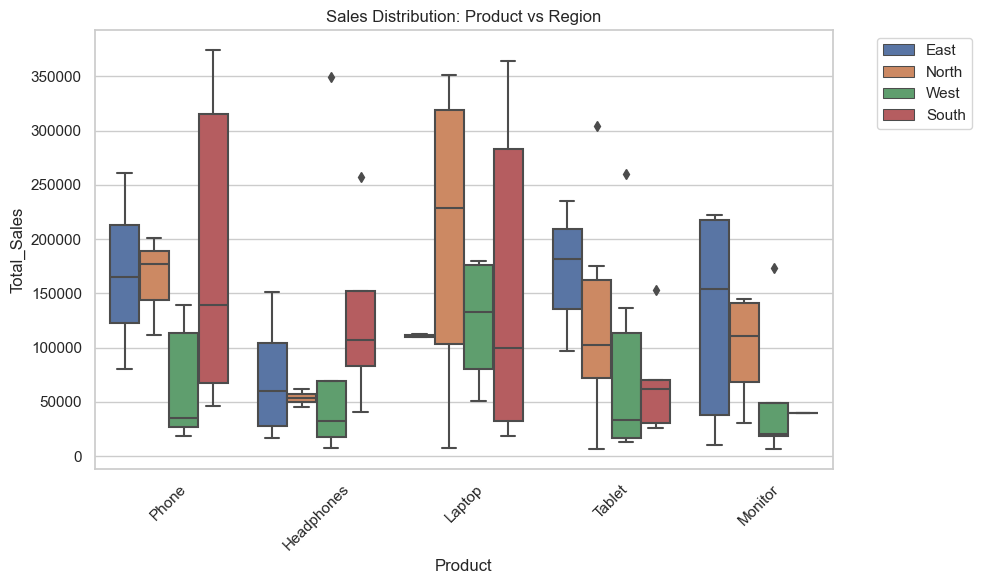

In [9]:
# 3. Box plot with 'hue' to compare regions within products
plt.clf()
sns.boxplot(data=df, x='Product', y='Total_Sales', hue='Region')
plt.title('Sales Distribution: Product vs Region')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('box_plot_product_region_comparison.png')

## Build correlation heatmaps for numerical data

In [10]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

In [11]:
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.clf()
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

             Quantity     Price  Total_Sales
Quantity     1.000000  0.008014     0.688107
Price        0.008014  1.000000     0.646131
Total_Sales  0.688107  0.646131     1.000000


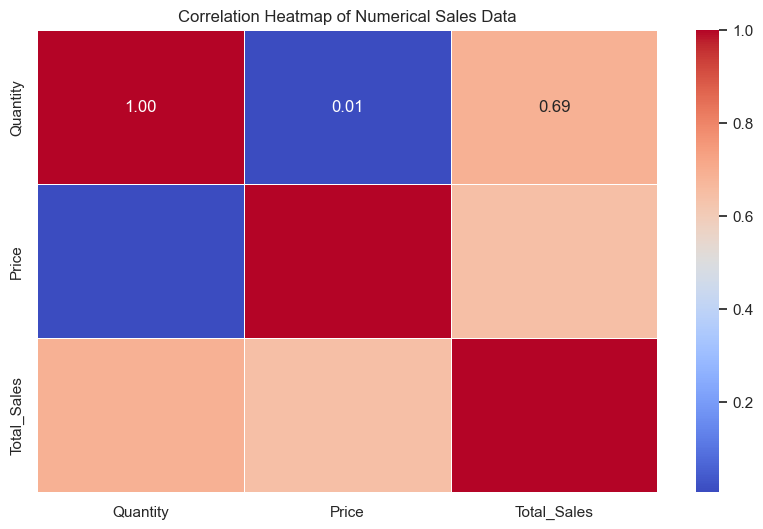

In [12]:
# Create a heatmap
# annot=True adds the correlation coefficients to the cells
# cmap='coolwarm' provides a clear diverging color scale
# fmt=".2f" formats the numbers to two decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Sales Data')
plt.savefig('correlation_heatmap.png')

# Output the correlation matrix values to verify
print(corr_matrix)

## Design professional-looking charts with custom styles

In [13]:
# Load data
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Define a professional custom color palette
custom_palette = ["#2a9d8f", "#e9c46a", "#f4a261", "#e76f51", "#264653"]

In [15]:
# Apply global styling
sns.set_theme(style="ticks", context="talk")
plt.rcParams['font.family'] = 'sans-serif'

<Figure size 1000x600 with 0 Axes>

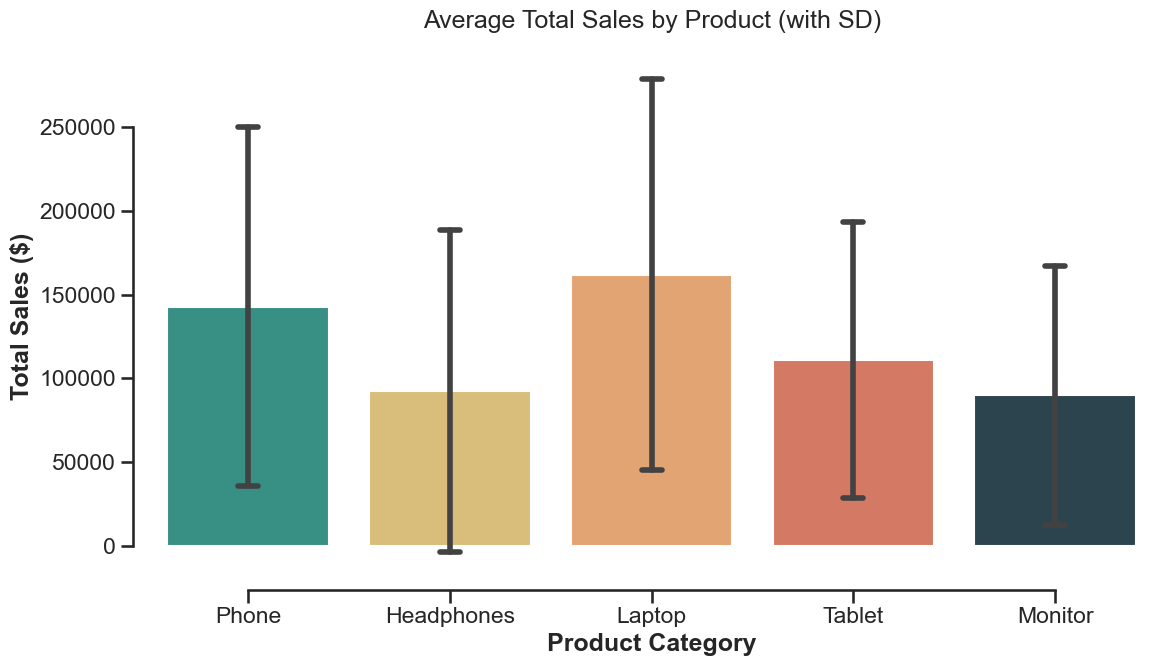

In [16]:
# 1. Professional Bar Plot: Average Sales per Product
plt.clf()
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df, 
    x='Product', 
    y='Total_Sales', 
    palette=custom_palette,
    capsize=.1,
    errorbar='sd' # Show standard deviation
)
sns.despine(trim=True, offset=10)
plt.title('Average Total Sales by Product (with SD)', fontsize=18, pad=20)
plt.xlabel('Product Category', fontweight='bold')
plt.ylabel('Total Sales ($)', fontweight='bold')
plt.tight_layout()
plt.savefig('professional_bar_plot.png')

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<Figure size 1000x600 with 0 Axes>

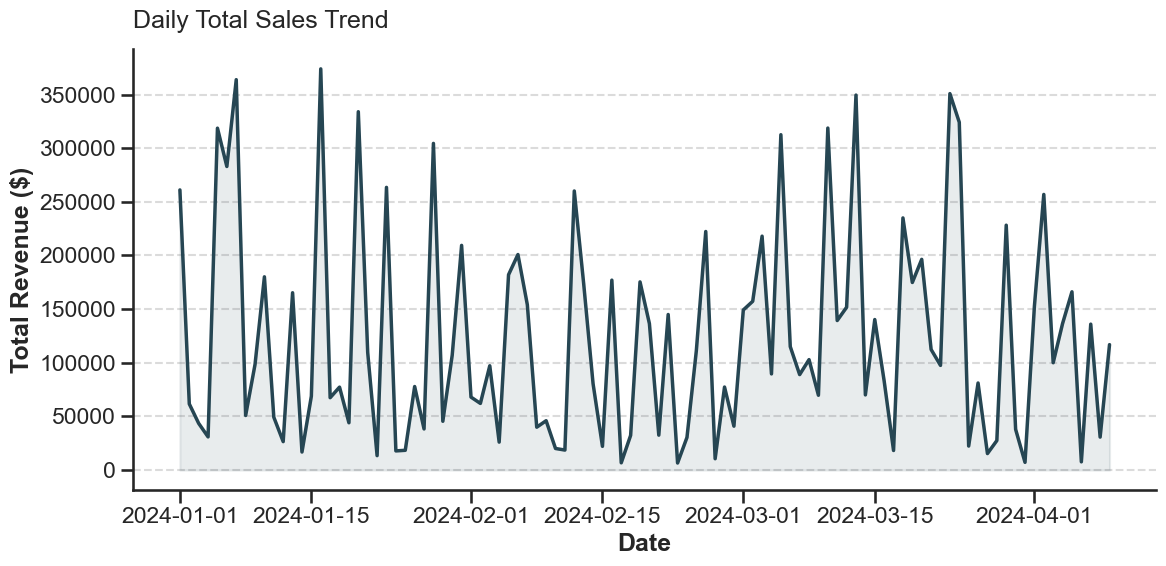

In [18]:
# 2. Professional Time Series: Sales Trend
# Grouping by date for a cleaner line
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

plt.clf()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Date', y='Total_Sales', color='#264653', linewidth=2.5)
plt.fill_between(daily_sales['Date'], daily_sales['Total_Sales'], color='#264653', alpha=0.1)
sns.despine()
plt.title('Daily Total Sales Trend', fontsize=18, loc='left', pad=15)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Revenue ($)', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('professional_line_plot.png')

<Figure size 1000x600 with 0 Axes>

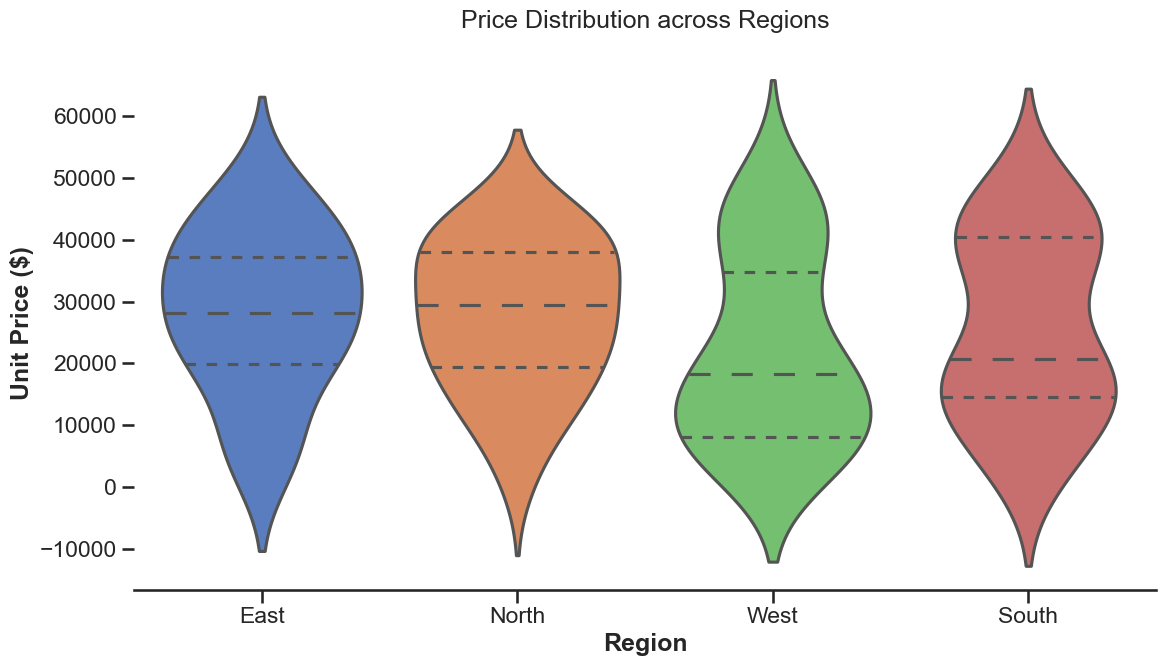

In [19]:
# 3. Refined Violin Plot: Price Distribution by Region
plt.clf()
plt.figure(figsize=(12, 7))
sns.violinplot(
    data=df, 
    x='Region', 
    y='Price', 
    split=True, 
    inner="quart", 
    palette="muted",
    bw_adjust=.5
)
sns.despine(left=True)
plt.title('Price Distribution across Regions', fontsize=18, pad=20)
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Unit Price ($)', fontweight='bold')
plt.tight_layout()
plt.savefig('professional_violin_plot.png')

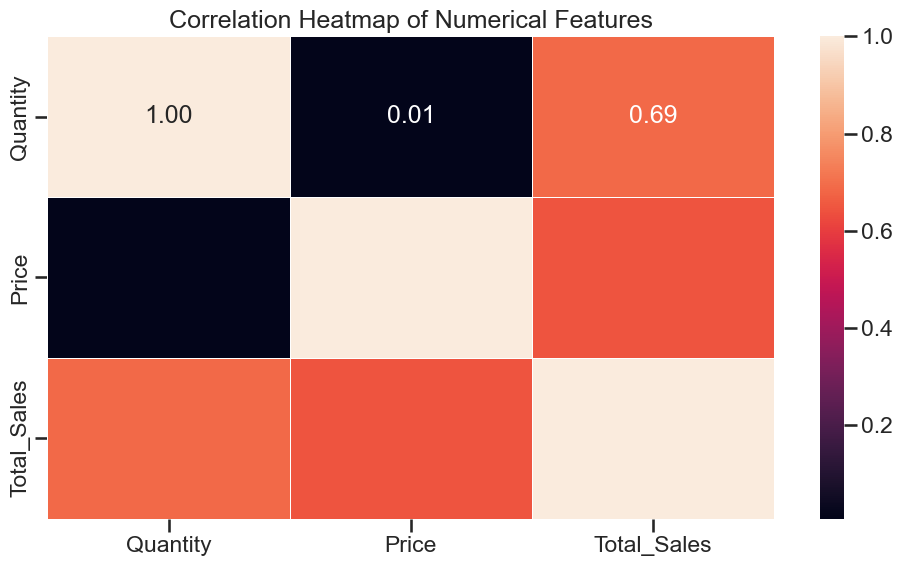

In [20]:
corr = df.select_dtypes("number").corr()

plt.figure()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


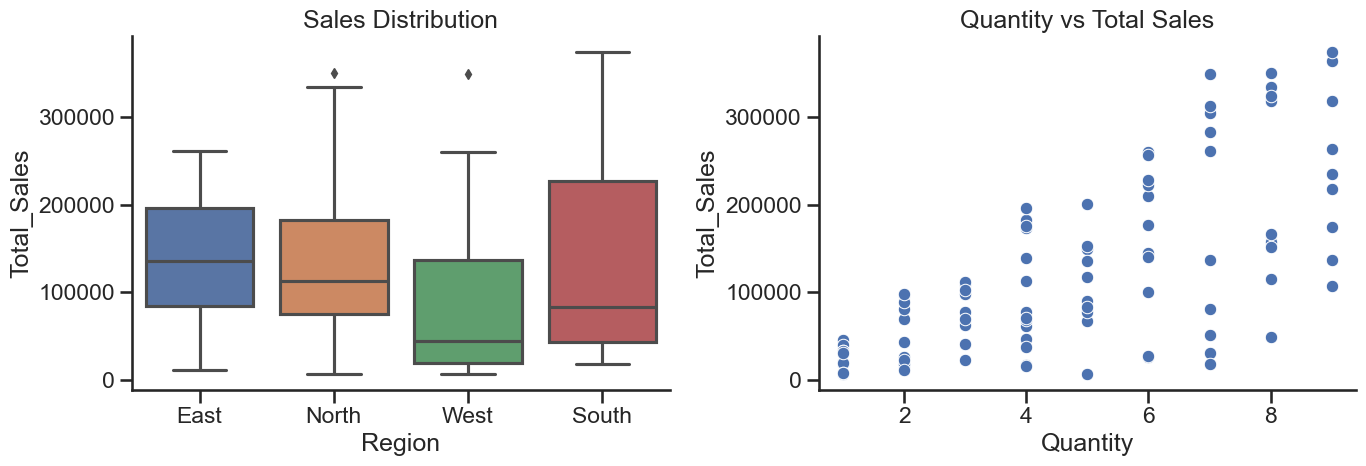

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(
    data=df,
    x="Region",
    y="Total_Sales",
    ax=axes[0]
)
axes[0].set_title("Sales Distribution")

# Scatter plot
sns.scatterplot(
    data=df,
    x="Quantity",
    y="Total_Sales",
    ax=axes[1]
)
axes[1].set_title("Quantity vs Total Sales")

sns.despine()
plt.tight_layout()
plt.show()


## Create multiple subplots in a single figure

In [22]:
# Set the style
sns.set_theme(style="whitegrid")

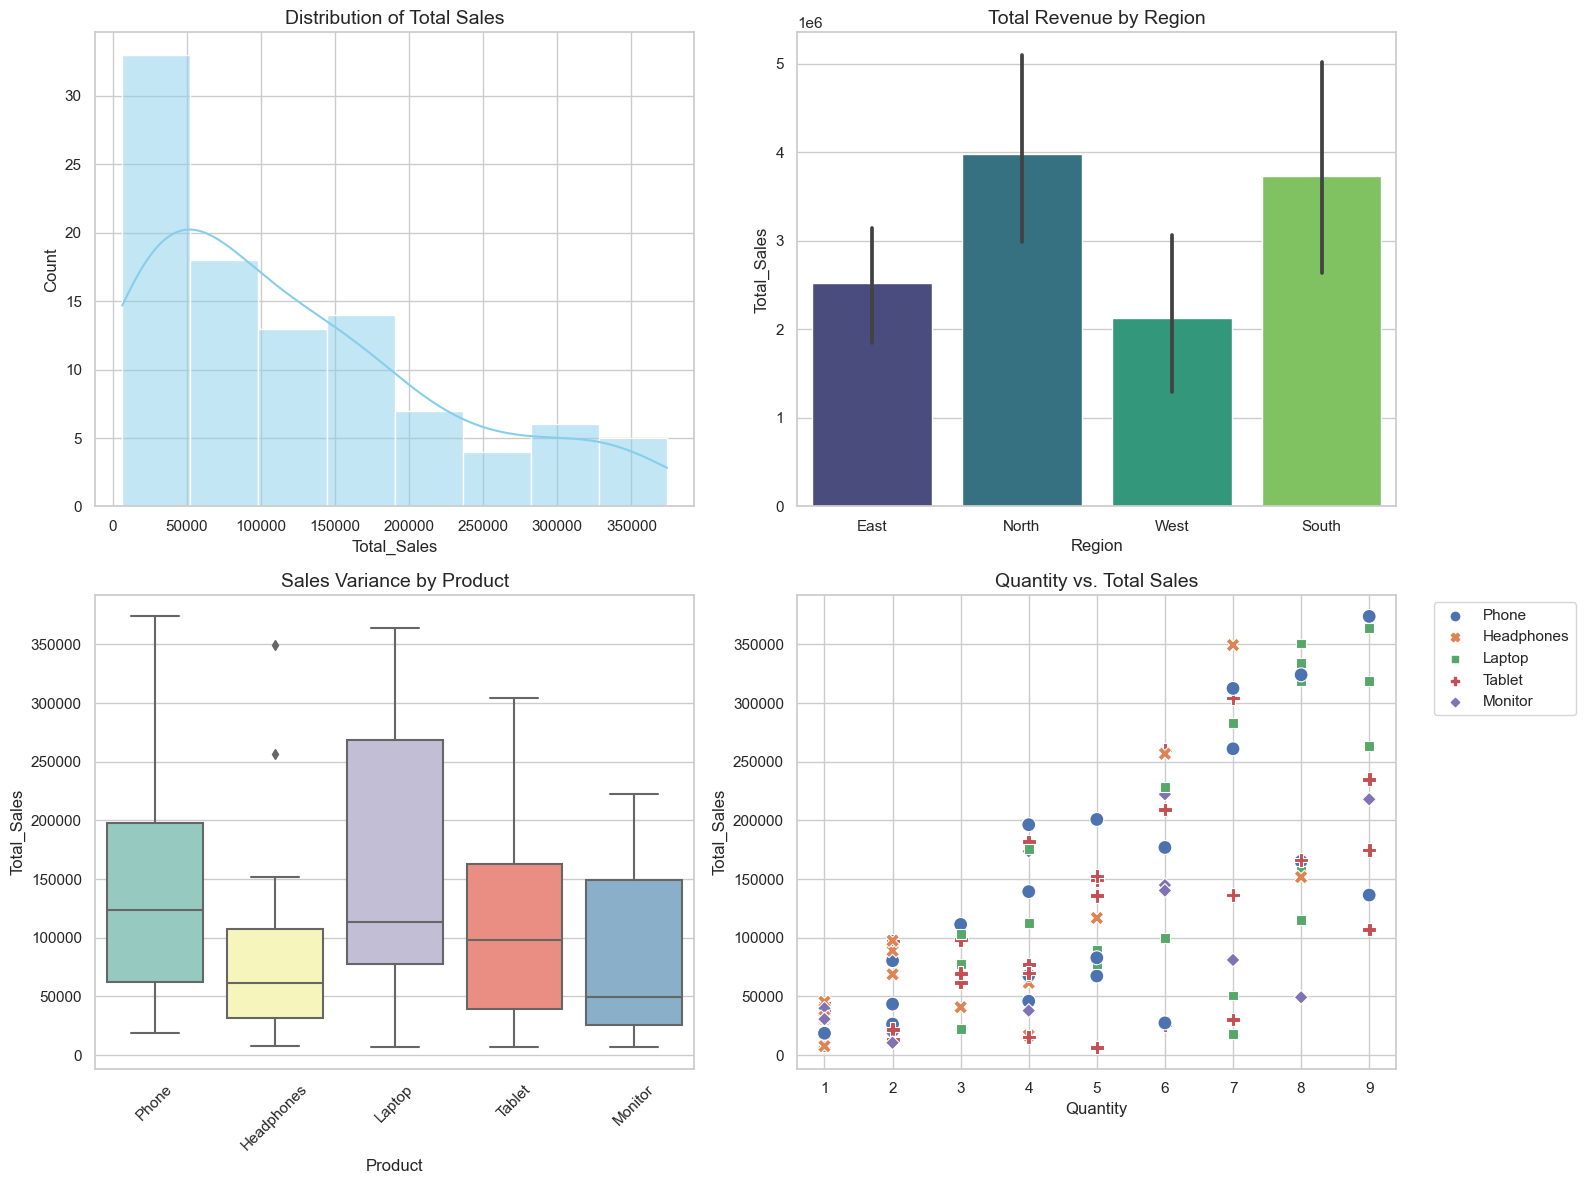

In [23]:
# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of Total Sales (Top Left)
sns.histplot(df['Total_Sales'], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Sales', fontsize=14)
# 2. Total Sales by Region (Top Right)
sns.barplot(data=df, x='Region', y='Total_Sales', estimator=sum, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Total Revenue by Region', fontsize=14)

# 3. Sales Distribution by Product (Bottom Left)
sns.boxplot(data=df, x='Product', y='Total_Sales', palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Sales Variance by Product', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Quantity vs Total Sales (Bottom Right)
sns.scatterplot(data=df, x='Quantity', y='Total_Sales', hue='Product', style='Product', s=100, ax=axes[1, 1])
axes[1, 1].set_title('Quantity vs. Total Sales', fontsize=14)
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the combined figure
plt.savefig('combined_subplots.png')

## Build interactive charts with hover information

In [24]:
import pandas as pd
try:
    import plotly.express as px
    import plotly.io as pio
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False

try:
    import altair as alt
    ALTAIR_AVAILABLE = True
except ImportError:
    ALTAIR_AVAILABLE = False

print(f"Plotly available: {PLOTLY_AVAILABLE}")
print(f"Altair available: {ALTAIR_AVAILABLE}")

df = pd.read_csv('sales_data.csv')

if PLOTLY_AVAILABLE:
    fig = px.scatter(df, x="Quantity", y="Total_Sales", color="Product", 
                     hover_data=['Region', 'Date', 'Price'],
                     title="Interactive Sales: Quantity vs Total Sales")
    fig.write_html("interactive_sales_chart.html")
    print("Plotly chart saved.")

if ALTAIR_AVAILABLE:
    chart = alt.Chart(df).mark_circle(size=60).encode(
        x='Quantity',
        y='Total_Sales',
        color='Product',
        tooltip=['Product', 'Region', 'Date', 'Total_Sales']
    ).interactive()
    chart.save('interactive_sales_chart.json')
    print("Altair chart saved.")

Plotly available: True
Altair available: True
Plotly chart saved.
Altair chart saved.


## Combine multiple charts into a dashboard layout

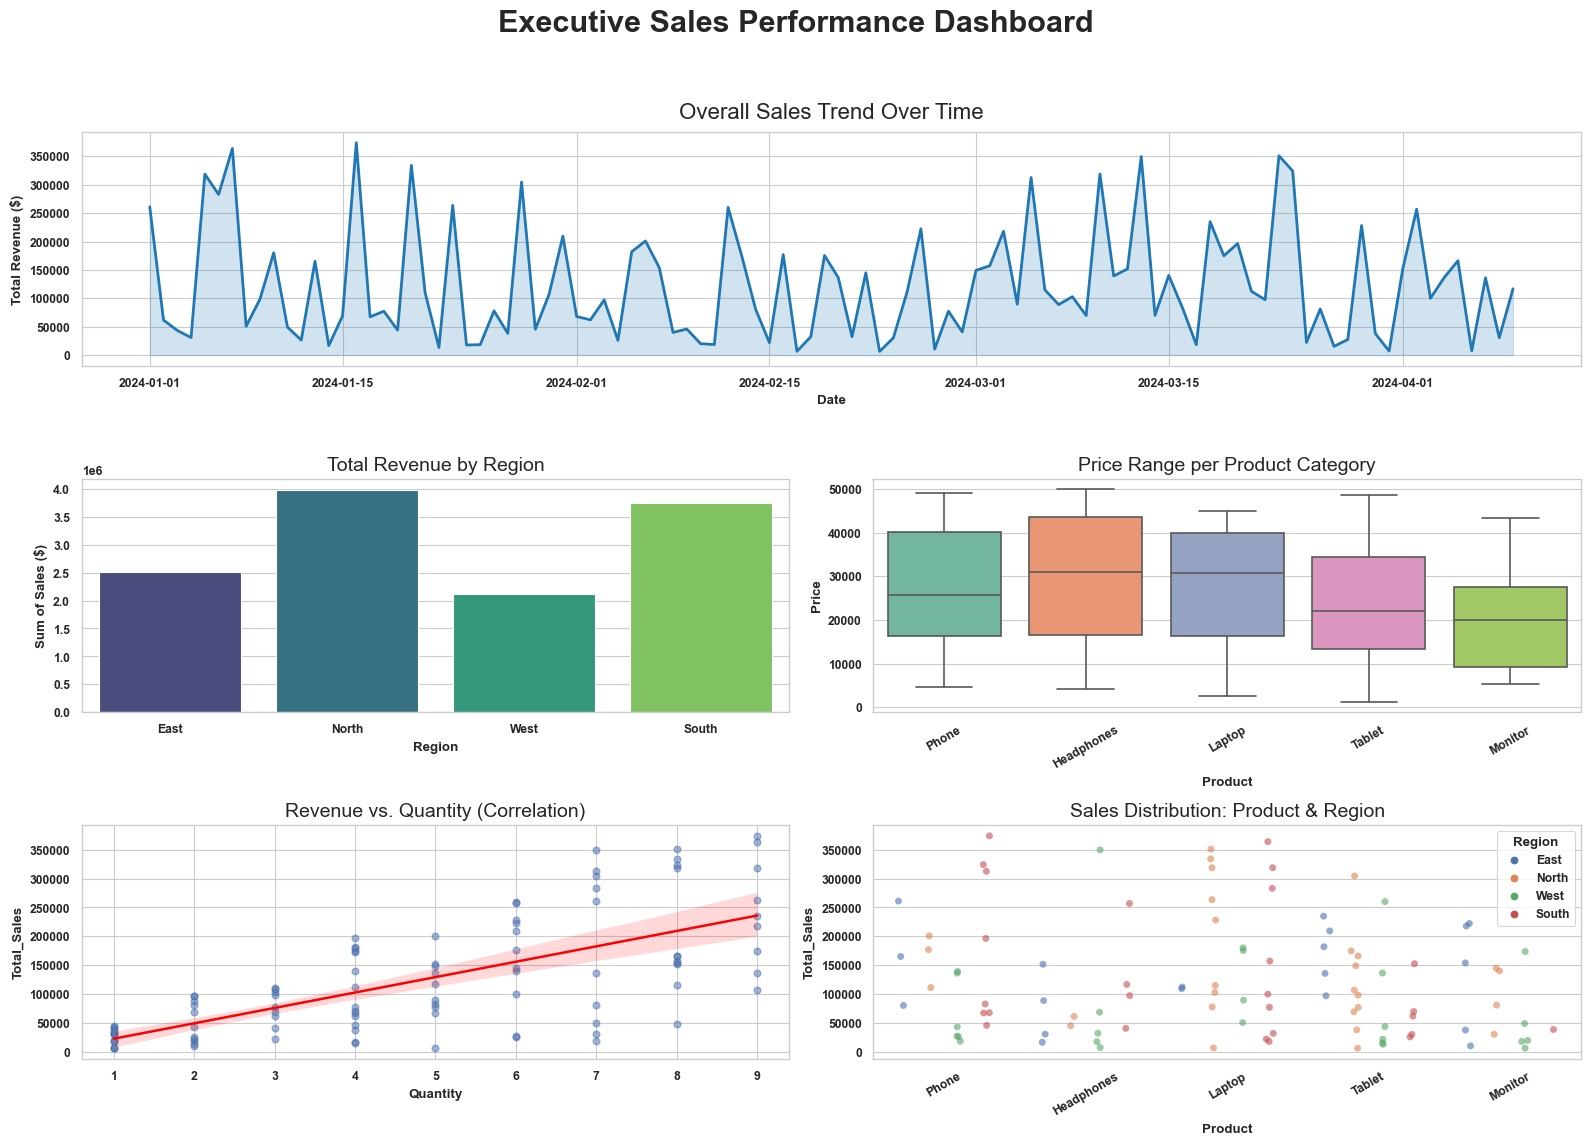

In [25]:
import matplotlib.gridspec as gridspec

# Load data
df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Set style
sns.set_theme(style="whitegrid", context="paper")
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

# Create the figure
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1])

# --- Plot 1: Sales Trend (Span full top row) ---
ax1 = fig.add_subplot(gs[0, :])
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()
sns.lineplot(data=daily_sales, x='Date', y='Total_Sales', ax=ax1, color='#1f77b4', linewidth=2)
ax1.fill_between(daily_sales['Date'], daily_sales['Total_Sales'], alpha=0.2, color='#1f77b4')
ax1.set_title('Overall Sales Trend Over Time', fontsize=16, pad=10)
ax1.set_ylabel('Total Revenue ($)')

# --- Plot 2: Regional Performance (Middle Left) ---
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(data=df, x='Region', y='Total_Sales', ax=ax2, estimator=sum, palette='viridis', errorbar=None)
ax2.set_title('Total Revenue by Region', fontsize=14)
ax2.set_ylabel('Sum of Sales ($)')

# --- Plot 3: Product Price Distribution (Middle Right) ---
ax3 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=df, x='Product', y='Price', ax=ax3, palette='Set2')
ax3.set_title('Price Range per Product Category', fontsize=14)
plt.setp(ax3.get_xticklabels(), rotation=30)

# --- Plot 4: Sales vs Quantity with Regression (Bottom Left) ---
ax4 = fig.add_subplot(gs[2, 0])
sns.regplot(data=df, x='Quantity', y='Total_Sales', ax=ax4, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax4.set_title('Revenue vs. Quantity (Correlation)', fontsize=14)

# --- Plot 5: Sales by Product & Region (Bottom Right) ---
ax5 = fig.add_subplot(gs[2, 1])
sns.stripplot(data=df, x='Product', y='Total_Sales', hue='Region', dodge=True, ax=ax5, alpha=0.6)
ax5.set_title('Sales Distribution: Product & Region', fontsize=14)
plt.setp(ax5.get_xticklabels(), rotation=30)
ax5.legend(title='Region', bbox_to_anchor=(1, 1))

# Final adjustments
fig.suptitle('Executive Sales Performance Dashboard', fontsize=22, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('sales_dashboard_layout.png')